<a href="https://colab.research.google.com/github/nisaodabas/CNG483-Project2/blob/master/CNG483_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import GlorotUniform, RandomUniform
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model  
from keras.utils import np_utils
import matplotlib.pyplot as plt
from google.colab import output
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def createDataSet(path):
    df = pd.read_csv(path, sep='\n')
    data = np.array(df)

    #print(data)
    numAttr = 0
    rows = []
    for row in data:        
        found = row[0].find("@ATTRIBUTE")
        if(found != -1):
            numAttr += 1
        else:
            # ignore @ATTRIBUTE rows
            rows.append(row[0].split(","))

    # delete @DATA row
    rows = np.array(rows[1:])

    labels = rows[:, -1].astype('int')
    
    labels = np.array([x - 1 for x in labels])

    if(numAttr == 6):
        features = rows[:, :numAttr-1].astype('float')
    else:
        features = rows[:, :numAttr-1].astype('int')
        # define feature selection
        #fs = SelectKBest(score_func=f_classif, k=4000)
        # apply feature selection
        #features = fs.fit_transform(features, labels)
        

    return features, labels

In [0]:
def model_textr(X, y, X_test, y_test, dim):
    
    # define model
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, shuffle=True, stratify=y, random_state=1)

    ## 0 - Hidden Layer NN ##

    model = Sequential()
    model.add(Dense(32, activation='relu', kernel_initializer=RandomUniform(seed=1), input_dim=dim))

    model.add(Dropout(0.8))
        
    model.add(Dense(3, activation='softmax'))

    # compile the model
    opt = RMSprop(learning_rate=0.00001, rho=0.9, momentum=0.0)
    #model.compile(optimizer=opt, loss='binary_crossentropy')
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])
    
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    
    numEpochs = 5000
    batches = 48

    ## 1 - Hidden Layer NN ##
    '''
    model = Sequential()
    model.add(Dense(48, activation='relu', kernel_initializer=RandomUniform(seed=1), input_dim=dim))

    model.add(Dropout(0.8))

    model.add(Dense(48, activation='relu', kernel_initializer=RandomUniform(seed=1)))
    
    model.add(Dropout(0.8))
        
    model.add(Dense(3, activation='softmax'))

    # compile the model
    opt = RMSprop(learning_rate=0.00001, rho=0.9, momentum=0.0)
    #model.compile(optimizer=opt, loss='binary_crossentropy')
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])
    
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    
    numEpochs = 5000
    batches = 48
    '''

    ## 2 - Hidden Layer NN ##
    '''
    model = Sequential()
    model.add(Dense(48, activation='relu', kernel_initializer=RandomUniform(seed=1), input_dim=dim))

    model.add(Dense(64, activation='relu', kernel_initializer=RandomUniform(seed=1)))
    
    model.add(Dropout(0.6))
    
    model.add(Dense(48, activation='relu', kernel_initializer=RandomUniform(seed=1)))
    model.add(Dropout(0.6))
    
    model.add(Dense(3, activation='softmax'))

    # compile the model
    opt = RMSprop(learning_rate=0.00001, rho=0.9, momentum=0.0)
    #model.compile(optimizer=opt, loss='binary_crossentropy')
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])
    
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    
    numEpochs = 5000
    batches = 48
    '''

    ## 3 - Hidden Layer NN ##
    '''
    model = Sequential()
    model.add(Dense(48, activation='relu', kernel_initializer=RandomUniform(seed=1), input_dim=dim))

    model.add(Dense(64, activation='relu', kernel_initializer=RandomUniform(seed=1)))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(64, activation='relu', kernel_initializer=RandomUniform(seed=1)))
    model.add(Dropout(0.5))
    
    model.add(Dense(48, activation='relu', kernel_initializer=RandomUniform(seed=1)))
    model.add(Dropout(0.5))

    model.add(Dense(3, activation='softmax'))

    # compile the model
    opt = RMSprop(learning_rate=0.00001, rho=0.9, momentum=0.0)
    #model.compile(optimizer=opt, loss='binary_crossentropy')
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])
    
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    
    numEpochs = 5000
    batches = 64
    '''
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=numEpochs, batch_size=batches, verbose=1 , callbacks=[es])

    # evaluate the model
    _, train_acc = model.evaluate(X_train, y_train, batch_size=batches, verbose=0)
    _, validation_acc = model.evaluate(X_val, y_val, batch_size=batches, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, batch_size=batches, verbose=0)
    print('Train: %.3f, Validation: %.3f, Test: %.3f'  % (train_acc*100, validation_acc*100, test_acc*100))
    

    #print(history.history.keys())
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    

In [0]:
def model_geo(X, y, X_test, y_test, dim):
    
    # define model
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, shuffle=True, stratify=y, random_state=1)

    # 0 - Hidden Layer NN #
    
    model = Sequential()
    model.add(Dense(4, activation='relu', kernel_initializer=RandomUniform(seed=1), input_dim=dim))

    #model.add(Dropout(0.2))

    model.add(Dense(3, activation='softmax'))

    # compile the model
    opt = RMSprop(learning_rate=0.00001, rho=0.9, momentum=0.0)
    #model.compile(optimizer=opt, loss='binary_crossentropy')
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])
    
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
    
    numEpochs = 5000
    batches = 28 

    # 1 - Hidden Layer NN #
    '''
    model = Sequential()
    model.add(Dense(8, activation='relu', kernel_initializer=RandomUniform(seed=1), input_dim=dim))

    #model.add(Dropout(0.2))

    model.add(Dense(5, activation='relu', kernel_initializer=RandomUniform(seed=1)))

    model.add(Dense(3, activation='softmax'))

    # compile the model
    opt = RMSprop(learning_rate=0.00001, rho=0.9, momentum=0.0)
    #model.compile(optimizer=opt, loss='binary_crossentropy')
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])
    
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    
    numEpochs = 5000
    batches = 64   
    '''

    # 2 - Hidden Layer NN #
    '''
    model = Sequential()
    model.add(Dense(8, activation='relu', kernel_initializer=RandomUniform(seed=1), input_dim=dim))

    model.add(Dense(12, activation='relu', kernel_initializer=RandomUniform(seed=1)))
    
    #model.add(Dropout(0.2))
    
    model.add(Dense(8, activation='relu', kernel_initializer=RandomUniform(seed=1)))
    #model.add(Dropout(0.2))

    model.add(Dense(3, activation='softmax'))

    # compile the model
    opt = RMSprop(learning_rate=0.0001, rho=0.9, momentum=0.0)
    #model.compile(optimizer=opt, loss='binary_crossentropy')
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])
    
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    
    numEpochs = 5000
    batches = 64
    '''
    # 3 - Hidden Layer NN #
    '''
    model = Sequential()
    model.add(Dense(12, activation='relu', kernel_initializer=RandomUniform(seed=1), input_dim=dim))

    model.add(Dense(24, activation='relu', kernel_initializer=RandomUniform(seed=1)))
    
    #model.add(Dropout(0.2))
    
    model.add(Dense(24, activation='relu', kernel_initializer=RandomUniform(seed=1)))
    #model.add(Dropout(0.2))
    
    model.add(Dense(12, activation='relu', kernel_initializer=RandomUniform(seed=1)))
    #model.add(Dropout(0.2))

    model.add(Dense(3, activation='softmax'))

    # compile the model
    opt = RMSprop(learning_rate=0.0001, rho=0.9, momentum=0.0)
    #model.compile(optimizer=opt, loss='binary_crossentropy')
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])
    
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    
    numEpochs = 5000
    batches = 64
    '''

    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=numEpochs, batch_size=batches, verbose=1 , callbacks=[es])

    # evaluate the model
    _, train_acc = model.evaluate(X_train, y_train, batch_size=batches, verbose=0)
    _, validation_acc = model.evaluate(X_val, y_val, batch_size=batches, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, batch_size=batches, verbose=0)
    print('Train: %.3f, Validation: %.3f, Test: %.3f'  % (train_acc*100, validation_acc*100, test_acc*100))
    

    #print(history.history.keys())
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    

In [0]:
def model_combined(X, y, X_test, y_test, dim):
    
    # define model
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, shuffle=True, stratify=y, random_state=1)

    # 0 - Hidden Layer NN #
    
    model = Sequential()
    model.add(Dense(12, activation='relu', kernel_initializer=RandomUniform(seed=1), input_dim=dim))
    model.add(Dropout(0.1))

    model.add(Dense(3, activation='softmax'))

    # compile the model
    opt = RMSprop(learning_rate=0.00001, rho=0.9, momentum=0.0)
    #model.compile(optimizer=opt, loss='binary_crossentropy')
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])
    
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
    
    numEpochs = 5000
    batches = 36


    # 1 - Hidden Layer NN #
    '''
    model = Sequential()
    model.add(Dense(32, activation='relu', kernel_initializer=RandomUniform(seed=1), input_dim=dim))
    #model.add(Dropout(0.1))
    model.add(Dense(16, activation='relu', kernel_initializer=RandomUniform(seed=1)))

    model.add(Dense(3, activation='softmax'))

    # compile the model
    opt = RMSprop(learning_rate=0.00001, rho=0.9, momentum=0.0)
    #model.compile(optimizer=opt, loss='binary_crossentropy')
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])
    
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
    
    numEpochs = 5000
    batches = 26
    '''
    
    # 2 - Hidden Layer NN #
    '''
    model = Sequential()
    model.add(Dense(64, activation='relu', kernel_initializer=RandomUniform(seed=1), input_dim=dim))
    #model.add(Dropout(0.1))
    model.add(Dense(64, activation='relu', kernel_initializer=RandomUniform(seed=1)))
    
    #model.add(Dropout(0.2))
    
    model.add(Dense(32, activation='relu', kernel_initializer=RandomUniform(seed=1)))
    #model.add(Dropout(0.2))

    model.add(Dense(3, activation='softmax'))

    # compile the model
    opt = RMSprop(learning_rate=0.00001, rho=0.9, momentum=0.0)
    #model.compile(optimizer=opt, loss='binary_crossentropy')
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])
    
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
    
    numEpochs = 5000
    batches = 26
    '''
    # 3 - Hidden Layer NN #
    '''
    model = Sequential()
    model.add(Dense(96, activation='relu', kernel_initializer=RandomUniform(seed=1), input_dim=dim))

    model.add(Dense(128, activation='relu', kernel_initializer=RandomUniform(seed=1)))
    
    #model.add(Dropout(0.2))
    
    model.add(Dense(96, activation='relu', kernel_initializer=RandomUniform(seed=1)))
    #model.add(Dropout(0.2))
    
    model.add(Dense(48, activation='relu', kernel_initializer=RandomUniform(seed=1)))
    #model.add(Dropout(0.2))

    model.add(Dense(3, activation='softmax'))

    # compile the model
    opt = RMSprop(learning_rate=0.000001, rho=0.9, momentum=0.0)
    #model.compile(optimizer=opt, loss='binary_crossentropy')
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])
    
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    
    numEpochs = 5000
    batches = 128
    '''

    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=numEpochs, batch_size=batches, verbose=1 , callbacks=[es])

    # evaluate the model
    _, train_acc = model.evaluate(X_train, y_train,verbose=0)
    _, validation_acc = model.evaluate(X_val, y_val, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print('Train: %.3f, Validation: %.3f, Test: %.3f'  % (train_acc*100, validation_acc*100, test_acc*100))
    

    #print(history.history.keys())
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    

In [0]:
if __name__ == "__main__":
    geometic_test_path = "/content/drive/My Drive/CNG483-Project 2/IrisGeometicFeatures_TestingSet.txt"
    geometic_train_path = "/content/drive/My Drive/CNG483-Project 2/IrisGeometicFeatures_TrainingSet.txt"

    texture_test_path = "/content/drive/My Drive/CNG483-Project 2/IrisTextureFeatures_TestingSet.txt"
    texture_train_path = "/content/drive/My Drive/CNG483-Project 2/IrisTextureFeatures_TrainingSet.txt"


    geo_x_train, geo_y_train = createDataSet(geometic_train_path)
    geo_x_test, geo_y_test = createDataSet(geometic_test_path)

    txtr_x_train, txtr_y_train = createDataSet(texture_train_path)
    txtr_x_test, txtr_y_test = createDataSet(texture_test_path)

    all_x_train = np.concatenate((txtr_x_train, geo_x_train), axis=1)
    all_x_test = np.concatenate((txtr_x_test, geo_x_test), axis=1)

Texture Features
Epoch 1/5000
21/21 [==============================] - 0s 12ms/step - loss: 3.4972 - acc: 0.3560 - val_loss: 1.3587 - val_acc: 0.3256
Epoch 2/5000
21/21 [==============================] - 0s 8ms/step - loss: 2.4769 - acc: 0.3992 - val_loss: 1.1940 - val_acc: 0.4360
Epoch 3/5000
21/21 [==============================] - 0s 8ms/step - loss: 1.9848 - acc: 0.4331 - val_loss: 1.0972 - val_acc: 0.4826
Epoch 4/5000
21/21 [==============================] - 0s 8ms/step - loss: 1.6394 - acc: 0.4516 - val_loss: 1.0442 - val_acc: 0.5000
Epoch 5/5000
21/21 [==============================] - 0s 8ms/step - loss: 1.4996 - acc: 0.4805 - val_loss: 1.0000 - val_acc: 0.5116
Epoch 6/5000
21/21 [==============================] - 0s 9ms/step - loss: 1.3600 - acc: 0.5000 - val_loss: 0.9659 - val_acc: 0.5174
Epoch 7/5000
21/21 [==============================] - 0s 8ms/step - loss: 1.2337 - acc: 0.5504 - val_loss: 0.9481 - val_acc: 0.5174
Epoch 8/5000
21/21 [==============================] - 0s 8

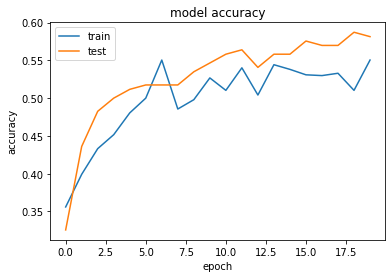

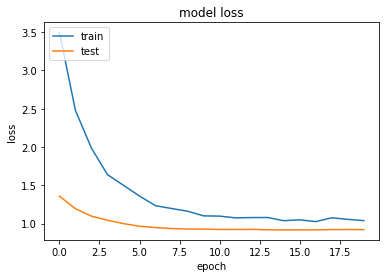

In [124]:
    print("Texture Features")
    model_textr(txtr_x_train, txtr_y_train, txtr_x_test, txtr_y_test, 9600)  
    

In [0]:
    print("Geometric Features")
    model_geo(geo_x_train, geo_y_train, geo_x_test, geo_y_test, 5)
    

Streaming output truncated to the last 5000 lines.
Epoch 965/5000
35/35 [==============================] - 0s 2ms/step - loss: 0.9738 - acc: 0.5730 - val_loss: 0.9725 - val_acc: 0.5756
Epoch 966/5000
35/35 [==============================] - 0s 2ms/step - loss: 0.9737 - acc: 0.5730 - val_loss: 0.9724 - val_acc: 0.5756
Epoch 967/5000
35/35 [==============================] - 0s 2ms/step - loss: 0.9736 - acc: 0.5730 - val_loss: 0.9723 - val_acc: 0.5756
Epoch 968/5000
35/35 [==============================] - 0s 2ms/step - loss: 0.9735 - acc: 0.5730 - val_loss: 0.9722 - val_acc: 0.5756
Epoch 969/5000
35/35 [==============================] - 0s 2ms/step - loss: 0.9734 - acc: 0.5730 - val_loss: 0.9721 - val_acc: 0.5756
Epoch 970/5000
35/35 [==============================] - 0s 2ms/step - loss: 0.9733 - acc: 0.5730 - val_loss: 0.9720 - val_acc: 0.5756
Epoch 971/5000
35/35 [==============================] - 0s 2ms/step - loss: 0.9732 - acc: 0.5730 - val_loss: 0.9719 - val_acc: 0.5756
Epoch 972/5

In [0]:
    print("Both Texture and Geometric Features")
    model_combined(all_x_train, txtr_y_train, all_x_test, txtr_y_test, 9605)

In [0]:
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')